In [1]:
%matplotlib inline
%run init.py

Loading places/bristol25
Loading Telford and Wrekin
Loading Caerphilly
Loading City of Edinburgh
Loading York
Loading Renfrewshire
Loading Medway
Loading Bridgend
Loading Redcar and Cleveland
Loading City of Bristol
Loading Swindon
Loading Newport
Loading Yell
Loading Stockton-on-Tees
Loading North East Lincolnshire
Loading Windsor and Maidenhead
Loading Darlington
Loading Aberdeen City
Loading Thurrock
Loading West Dunbartonshire
Loading Warrington
Loading Wokingham
Loading Lewes
Loading North Warwickshire
Loading Rotherham
Loading Warwick District
Loading North West Leicestershire
Loading Charnwood
Loading North East Derbyshire
Loading Guildford
Loading Birmingham
Loading Amber Valley
Loading Rochford
Loading Mole Valley
Loading Wirral District
Loading Tandridge
Loading Tonbridge and Malling
Loading Kettering
Loading Arun
Loading Bromsgrove
Loading Hart
Loading Dacorum
Loading Newcastle-under-Lyme
Loading Sefton
Loading Chorley
Loading Chiltern
Loading Wyre Forest
Loading Wigan
Loadi

In [2]:
len(R['Qp'])

695

In [3]:
R.keys()

['Q50b',
 'Q50f',
 'Qp',
 'Tmaxf',
 'Ts',
 'T90f1i',
 'Tm',
 'D50',
 'T90b',
 'T90f',
 'Q50',
 'Dm',
 'D90',
 'Q90',
 'Q50f1',
 'Q50f2',
 'Dmax',
 'T90',
 'Ds',
 'Qmf1',
 'Qs',
 'T90f2i',
 'Tmax',
 'Qmax',
 'N',
 'W',
 'Qm',
 'Q90b',
 'Q90f',
 'Qmf2',
 'Q90f1',
 'Q90f2',
 'Qmb',
 'Qmf']

In [4]:
# Find the destination node and node index that meets the given condition
from matplotlib.mlab import find
tofind = 'T90f'
condition = R[tofind]<0
A = find(condition)
for a in A:
    for k in Xi.keys():
        for x,xi in zip(X[k],Xi[k]):
            if a==xi:
                print x,xi,k,D[tofind][xi]

In [5]:
# Looking at all cities here

# def CI_fig(CI,nbins = 1000):
CI = 68

'''civ needs to be a value between 0-100'''

upper = 50 + CI/2
lower = 50 - CI/2    

# Flow vs time with 50%-CI/2, 50%, 50%+CI  marked

all_x=[]
all_y=[]

for city in p.names:
    V = loadCity('Q',city)

    for d,di in zip(V,Xi[city]):
        # Only proceed if there are agents present in this destination
        if R['N'][di] > 0:            
            try:
                trange = range(len(V[d]))
                x=trange
                y=V[d]
                all_x.extend(x)
                all_y.extend(y)        
            except ZeroDivisionError:
                pass    

all_x = np.array(all_x)*60
all_y = np.array(all_y)/60

In [6]:
# Normalised flow vs normalised time with 50%-CI/2, 50%, 50%+CI/2  marked
all_norm_x=[]
all_norm_y=[]

for city in p.names:
    V = loadCity('Q',city)

    for d,di in zip(X[city],Xi[city]):
        # Only proceed if there are agents present in this destination            
        if R['N'][di] > 0:
            try:
                x = np.array(range(len(V[d])))/R['T90f'][di] # Normalised by free flow time
                y = np.array(V[d])/R['Qp'][di] # Normalised by predicted average flow
                #plt.plot(x,y,label=di,zorder=-32,alpha=0.2,linewidth=0.2)

                all_norm_x.extend(x)
                all_norm_y.extend(y)
            except KeyError:
                pass

all_norm_x = np.array(all_norm_x)
all_norm_y = np.array(all_norm_y)    

In [7]:
# Regular figures
nbins = 7583    

H,xedges=np.histogram(all_x,bins=nbins)

digitized = np.digitize(all_x, xedges)

x_range = np.array(range(len(xedges)))+1

x_len = np.array([len(all_x[digitized == i]) for i in x_range])
x_mean = np.array([all_x[digitized == i].mean() for i in x_range])
y_lower = np.array([np.percentile(all_y[digitized == i],lower) for i in x_range])
y_median = np.array([np.percentile(all_y[digitized == i],50) for i in x_range])
y_upper = np.array([np.percentile(all_y[digitized == i],upper) for i in x_range])

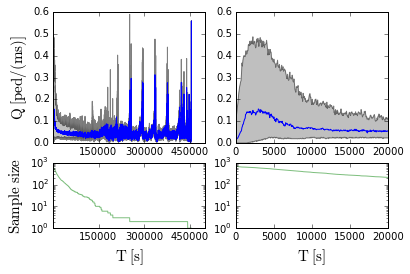

In [8]:
from matplotlib import gridspec

fig = plt.figure()

gs = gridspec.GridSpec(2, 2,
                       height_ratios=[2,1],
                       )

fontsize = 15

myxticks = [150000,300000,450000]

narrowband = 20000

ax0 = plt.subplot(gs[0])
ax0.plot(x_mean,y_median,label='$\mathrm{Q \ [ped/(ms)]}$')
ax0.fill_between(x_mean,y_upper,y_lower,facecolor='gray',alpha=0.5)
ax0.set_ylabel('$\mathrm{Q \ [ped/(ms)]}$',fontsize=fontsize)
# ax0.legend(loc=2)

ax0.set_xticks(myxticks)

ax1 = plt.subplot(gs[2])
ax1.plot(x_mean,x_len,label='$\mathrm{Sample \ size}$',color='g',alpha=0.5)
ax1.set_xlabel('$\mathrm{T \ [s]}$',fontsize=fontsize)
ax1.set_ylabel('$\mathrm{Sample \ size}$',fontsize=fontsize)
ax1.set_yscale('log')
# ax1.legend(loc=1)

ax1.set_xticks(myxticks)

# RHS
ax3 = plt.subplot(gs[1])
ax3.plot(x_mean,y_median)
ax3.fill_between(x_mean,y_upper,y_lower,facecolor='gray',alpha=0.5)
ax3.set_xlim(None,narrowband)   
# ax3.legend(fontsize=10)

ax4 = plt.subplot(gs[3])
ax4.plot(x_mean,x_len,color='g',alpha=0.5)
ax4.set_xlabel('$\mathrm{T \ [s]}$',fontsize=fontsize)
ax4.set_yscale('log',fontsize=fontsize)
ax4.set_xlim(None,narrowband)
ax4.axvline(1,c='r',linestyle='-.',label='$\mathrm{{T/{0}}} = 1$'.format(pl['T90f']))    

plt.gcf().subplots_adjust(bottom=0.15)
plt.savefig('../PhD/Papers/2014.12.untitled/figs/{0}-all-T-Q.pdf'.format(CI))

In [9]:
# Normalised figures
nbins = 7212

H,xedges=np.histogram(all_norm_x,bins=nbins)

digitized = np.digitize(all_norm_x, xedges)

x_range = np.array(range(len(xedges)))+1

x_len = np.array([len(all_norm_x[digitized == i]) for i in x_range])
x_mean = np.array([all_norm_x[digitized == i].mean() for i in x_range])
y_lower = np.array([np.percentile(all_norm_y[digitized == i],lower) for i in x_range])
y_median = np.array([np.percentile(all_norm_y[digitized == i],50) for i in x_range])
y_upper = np.array([np.percentile(all_norm_y[digitized == i],upper) for i in x_range])    

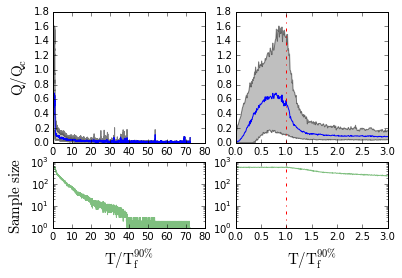

In [106]:

#***
fig = plt.figure()

gs = gridspec.GridSpec(2, 2,
                       height_ratios=[2,1],
                       width_ratios=[1,1]
                       )

fontsize = 15

# LHS
ax0 = plt.subplot(gs[0])
ax0.plot(x_mean,y_median)
ax0.fill_between(x_mean,y_upper,y_lower,facecolor='gray',alpha=0.5)
ax0.set_ylabel('$\mathrm{{Q/{0}}}$'.format(pl['Qp']),fontsize=fontsize)

ax2 = plt.subplot(gs[2])
ax2.plot(x_mean,x_len,label='$\mathrm{Sample \ size}$',color='g',alpha=0.5)
ax2.set_xlabel('$\mathrm{{T/{0}}}$'.format(pl['T90f']),fontsize=fontsize)
ax2.set_ylabel('$\mathrm{Sample \ size}$',fontsize=fontsize)
ax2.set_yscale('log',fontsize=fontsize)

# RHS
ax3 = plt.subplot(gs[1])
ax3.plot(x_mean,y_median)
ax3.fill_between(x_mean,y_upper,y_lower,facecolor='gray',alpha=0.5)
ax3.set_xlim(None,3)   
ax3.axvline(1,c='r',linestyle='-.',label='$\mathrm{T/T_f^{90\%} = 1}$')
# ax3.legend(fontsize=10)

ax4 = plt.subplot(gs[3])
ax4.plot(x_mean,x_len,color='g',alpha=0.5)
ax4.set_xlabel('$\mathrm{{T/{0}}}$'.format(pl['T90f']),fontsize=fontsize)
ax4.set_yscale('log',fontsize=fontsize)
ax4.set_xlim(None,3)
ax4.axvline(1,c='r',linestyle='-.',label='$\mathrm{{T/{0}}} = 1$'.format(pl['T90f']))    

plt.gcf().subplots_adjust(bottom=0.15)
plt.savefig('../PhD/Papers/2014.12.untitled/figs/{0}-all-norm-T-Q.pdf'.format(CI))

In [97]:
max(x_mean)

72.132542710609698